In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from textblob import TextBlob
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_curve, auc
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from time import time

In [29]:
df_train_data = pd.read_csv('C:\\Users\\FIONA_SHREK\\big-data-project\\data\\train__reviews.csv')
df_test_data = pd.read_csv('C:\\Users\\FIONA_SHREK\\big-data-project\\data\\test__reviews.csv')


In [30]:
df_train_data.columns = ['review','target']
df_train_data = df_train_data.sample(frac = 0.177)
df_train_data.shape

(637196, 2)

In [31]:
df_test_data.columns = ['review','target']
df_test_data.shape


(399997, 2)

In [32]:
X_train, X_validation, y_train, y_validation = train_test_split(df_train_data.review, df_train_data.target, test_size = 0.02, random_state = 1234)

print("training data has {0} entries. {1:.2f}% positive and {2:.2f}% negative".format(len(y_train), len(y_train[y_train==1])/len(y_train)*100, len(y_train[y_train==0])/len(y_train)*100))
print("validation data has {0} entries. {1:.2f}% positive and {2:.2f}% negative".format(len(y_validation), len(y_validation[y_validation==1])/len(y_validation)*100, len(y_validation[y_validation==0])/len(y_validation)*100))

training data has 624452 entries. 50.05% positive and 49.95% negative
validation data has 12744 entries. 50.09% positive and 49.91% negative


In [33]:
len(y_train[y_train==1])/len(y_train)

0.5005108479114487

In [34]:
tb_sentiment = [TextBlob(i).sentiment.polarity for i in X_validation]
tb_sentiment = [0 if x < 0 else 1 for x in tb_sentiment]

In [35]:
cm = confusion_matrix(y_validation, tb_sentiment)
cm

array([[2653, 3708],
       [ 240, 6143]], dtype=int64)

In [36]:
print("accuracy = {:.2f}".format(accuracy_score(y_validation, tb_sentiment)))
print(classification_report(y_validation, tb_sentiment))

accuracy = 0.69
              precision    recall  f1-score   support

           0       0.92      0.42      0.57      6361
           1       0.62      0.96      0.76      6383

    accuracy                           0.69     12744
   macro avg       0.77      0.69      0.67     12744
weighted avg       0.77      0.69      0.67     12744



In [37]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression

In [38]:
vectorizer = CountVectorizer()
clf = MultinomialNB()
n_features = np.arange(10000, 100001, 10000)

In [30]:
df_word_freq = pd.read_csv('C:\\Users\\FIONA_SHREK\\big-data-project-master\\data\\word_freq.csv')
df_word_freq.columns = ['word', 'neg', 'pos', 'total']
df_word_freq.head(25)

,word,neg,pos,total
0,to,313164,252567,565731
1,the,257870,266013,523883
2,not,238226,103119,341345
3,my,190845,125979,316824
4,it,157482,147804,305286
5,and,153972,149649,303621
6,you,103890,198340,302230
7,is,135021,111667,246688
8,in,115543,101163,216706
9,for,99003,117372,216375


In [31]:
custom_stop_words = list(df_word_freq.head(20).word)
del custom_stop_words[2]
custom_stop_words

['to',
 'the',
 'my',
 'it',
 'and',
 'you',
 'is',
 'in',
 'for',
 'of',
 'on',
 'that',
 'me',
 'have',
 'so',
 'do',
 'but',
 'just',
 'with']

In [32]:
from nltk.stem import WordNetLemmatizer

In [33]:
normalizer = WordNetLemmatizer()

In [34]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\FIONA_SHREK\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [36]:
df_train_data_2 = df_train_data.copy()
df_train_data_2['review'] = [' '.join([normalizer.lemmatize(word) for word in t.split()]) for t in df_train_data_2['review'].tolist()]
X_train, X_validation, y_train, y_validation = train_test_split(df_train_data.review, df_train_data.target, test_size = 0.02, random_state = 1234)

In [ ]:
res_trigram_lemma = compare_clf_nfeature(X_train, X_validation, y_train, y_validation, ngram_range=(1,3))

In [37]:
from nltk.stem import PorterStemmer

In [38]:
normalizer = PorterStemmer()

In [39]:
df_train_data_2 = df_train_data.copy()
df_train_data_2['review'] = [' '.join([normalizer.stem(word) for word in t.split()]) for t in df_train_data_2['review'].tolist()]
X_train, X_validation, y_train, y_validation = train_test_split(df_train_data.review, df_train_data.target, test_size = 0.02, random_state = 1234)

In [40]:
df_train_data_2.tail()

,review,target
920682,great life stori about how not to live thi boo...,1
2161629,review of faith of our father thi book doe not...,0
112280,gave up tri to play after hour of frustrat it ...,0
3237337,worth everi penni am veri happi with thi made ...,1
1949451,terrif remix as an avid fan the song are remix...,1


In [ ]:
def compare_clf_nfeature(X_train, X_test, y_train, y_test, vectorizer=vectorizer, clf=clf, n_features=n_features, stop_words=None, ngram_range = (1,1)):
    res = []
    print(clf)
    for feature in n_features:
        vectorizer.set_params(stop_words=stop_words, ngram_range=ngram_range, max_features=feature)
        acc_pipeline = Pipeline([('vectorizer', vectorizer), ('classifier', clf)])
        print("result on model with {} features".format(feature))
        accuracy, auc, time = calc_accuracy(acc_pipeline, X_train, X_test, y_train, y_test)
        res.append((feature, accuracy, auc, time))
        
    return res

In [39]:
def calc_accuracy(pipeline, X_train, X_test, y_train, y_test):
    t0 = time()
    sentiment_clf = pipeline.fit(X_train, y_train)
    y_pred = sentiment_clf.predict(X_test)
    train_test_time = time() - t0
    accuracy = accuracy_score(y_test, y_pred)
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    fpr, tpr, _ = roc_curve(y_test, y_pred, pos_label=1)
    roc_auc = auc(fpr, tpr)
    
    print("model accuracy : {0:.2f}".format(accuracy))
    print("model auc : {0:.2f}".format(roc_auc))
    print("train validation time : {0:.2f}s".format(train_test_time))
    print("=========================================================")
    
    return accuracy, roc_auc, train_test_time

In [34]:
res_trigram_stem = compare_clf_nfeature(X_train, X_validation, y_train, y_validation, ngram_range=(1,3))

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
result on model with 10000 features
model accuracy : 0.76
model auc : 0.76
train validation time : 11.62s
result on model with 20000 features
model accuracy : 0.77
model auc : 0.77
train validation time : 11.71s
result on model with 30000 features
model accuracy : 0.78
model auc : 0.78
train validation time : 11.62s
result on model with 40000 features
model accuracy : 0.78
model auc : 0.77
train validation time : 11.67s
result on model with 50000 features
model accuracy : 0.77
model auc : 0.77
train validation time : 11.88s
result on model with 60000 features
model accuracy : 0.77
model auc : 0.77
train validation time : 11.78s
result on model with 70000 features
model accuracy : 0.78
model auc : 0.78
train validation time : 11.83s
result on model with 80000 features
model accuracy : 0.78
model auc : 0.78
train validation time : 11.77s
result on model with 90000 features
model accuracy : 0.78
model auc : 0.78
train validation t

In [42]:
X_train, X_validation, y_train, y_validation = train_test_split(df_train_data.review, df_train_data.target, test_size = 0.02, random_state = 1234)
tf_vectorizer = TfidfVectorizer()
res_tfidf_trigram = compare_clf_nfeature(X_train, X_validation, y_train, y_validation, ngram_range=(1,3), vectorizer=tf_vectorizer)

MultinomialNB()
result on model with 10000 features
model accuracy : 0.88
model auc : 0.88
train validation time : 410.85s
result on model with 20000 features
model accuracy : 0.89
model auc : 0.89
train validation time : 383.57s
result on model with 30000 features
model accuracy : 0.90
model auc : 0.90
train validation time : 374.96s
result on model with 40000 features
model accuracy : 0.90
model auc : 0.90
train validation time : 389.17s
result on model with 50000 features
model accuracy : 0.90
model auc : 0.90
train validation time : 393.01s
result on model with 60000 features
model accuracy : 0.90
model auc : 0.90
train validation time : 386.99s
result on model with 70000 features
model accuracy : 0.90
model auc : 0.90
train validation time : 394.52s
result on model with 80000 features
model accuracy : 0.91
model auc : 0.91
train validation time : 442.46s
result on model with 90000 features
model accuracy : 0.91
model auc : 0.91
train validation time : 500.74s
result on model with 

In [43]:
res_tfidf_bigram = compare_clf_nfeature(X_train, X_validation, y_train, y_validation, ngram_range=(1,2), vectorizer=tf_vectorizer)

MultinomialNB()
result on model with 10000 features
model accuracy : 0.88
model auc : 0.88
train validation time : 393.60s
result on model with 20000 features
model accuracy : 0.89
model auc : 0.89
train validation time : 186.79s
result on model with 30000 features
model accuracy : 0.90
model auc : 0.90
train validation time : 176.19s
result on model with 40000 features
model accuracy : 0.90
model auc : 0.90
train validation time : 172.23s
result on model with 50000 features
model accuracy : 0.90
model auc : 0.90
train validation time : 180.69s
result on model with 60000 features
model accuracy : 0.90
model auc : 0.90
train validation time : 185.32s
result on model with 70000 features
model accuracy : 0.90
model auc : 0.90
train validation time : 175.69s
result on model with 80000 features
model accuracy : 0.90
model auc : 0.90
train validation time : 179.59s
result on model with 90000 features
model accuracy : 0.90
model auc : 0.90
train validation time : 196.17s
result on model with 

In [44]:
res_tfidf_unigram = compare_clf_nfeature(X_train, X_validation, y_train, y_validation, ngram_range=(1,1), vectorizer=tf_vectorizer)

MultinomialNB()
result on model with 10000 features
model accuracy : 0.85
model auc : 0.85
train validation time : 43.99s
result on model with 20000 features
model accuracy : 0.85
model auc : 0.85
train validation time : 44.16s
result on model with 30000 features
model accuracy : 0.85
model auc : 0.85
train validation time : 44.84s
result on model with 40000 features
model accuracy : 0.85
model auc : 0.85
train validation time : 47.70s
result on model with 50000 features
model accuracy : 0.85
model auc : 0.85
train validation time : 57.20s
result on model with 60000 features
model accuracy : 0.85
model auc : 0.85
train validation time : 47.56s
result on model with 70000 features
model accuracy : 0.85
model auc : 0.85
train validation time : 50.71s
result on model with 80000 features
model accuracy : 0.85
model auc : 0.85
train validation time : 50.18s
result on model with 90000 features
model accuracy : 0.85
model auc : 0.85
train validation time : 50.09s
result on model with 100000 fe

In [47]:
cols = ['n_features', 'val_acc', 'val_auc', 'time']
res_tfidf_unigram = pd.DataFrame(res_tfidf_unigram, columns=cols)
res_tfidf_bigram = pd.DataFrame(res_tfidf_bigram, columns=cols)
res_tfidf_trigram = pd.DataFrame(res_tfidf_trigram, columns=cols)

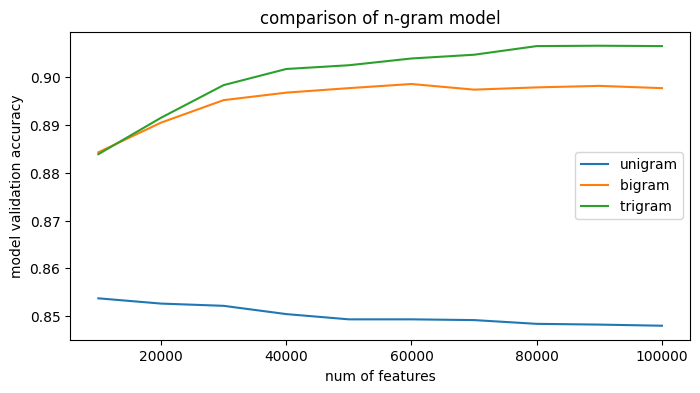

In [48]:
cols = ['n_features', 'val_acc', 'val_auc', 'time']
res_tfidf_unigram = pd.DataFrame(res_tfidf_unigram, columns=cols)
res_tfidf_bigram = pd.DataFrame(res_tfidf_bigram, columns=cols)
res_tfidf_trigram = pd.DataFrame(res_tfidf_trigram, columns=cols)
plt.figure(figsize=(8,4))
plt.plot(res_tfidf_unigram.n_features, res_tfidf_unigram.val_acc, label='unigram')
plt.plot(res_tfidf_bigram.n_features, res_tfidf_bigram.val_acc, label='bigram ')
plt.plot(res_tfidf_trigram.n_features, res_tfidf_trigram.val_acc, label='trigram ')
plt.title("comparison of n-gram model")
plt.xlabel("num of features")
plt.ylabel("model validation accuracy")
plt.legend()

In [ ]:
#Naive Bayes classifier

In [26]:
def plot_cm(cm):
    labels = ['negative', 'positive']
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(cm)
    plt.title('Confusion matrix of the sentiment analysis')
    fig.colorbar(cax)
    ax.set_xticklabels([''] + labels)
    ax.set_yticklabels([''] + labels)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

In [43]:
X_train, y_train = df_train_data.review, df_train_data.target
X_test, y_test = df_test_data.review, df_test_data.target

In [44]:
clf = MultinomialNB()
vectorizer = CountVectorizer(ngram_range=(1,3), max_features=90000)
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [45]:
clf.fit(X_train, y_train)
probas = clf.predict_proba(X_test)
y_pred = np.argmax(probas, axis=-1)
y_pred_prob = [i[1] for i in probas]
acc_score = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(acc_score)
print(cm)

0.893779203344025
[[178580  21420]
 [ 21068 178929]]


              precision    recall  f1-score   support

           0     0.8945    0.8929    0.8937    200000
           1     0.8931    0.8947    0.8939    199997

    accuracy                         0.8938    399997
   macro avg     0.8938    0.8938    0.8938    399997
weighted avg     0.8938    0.8938    0.8938    399997



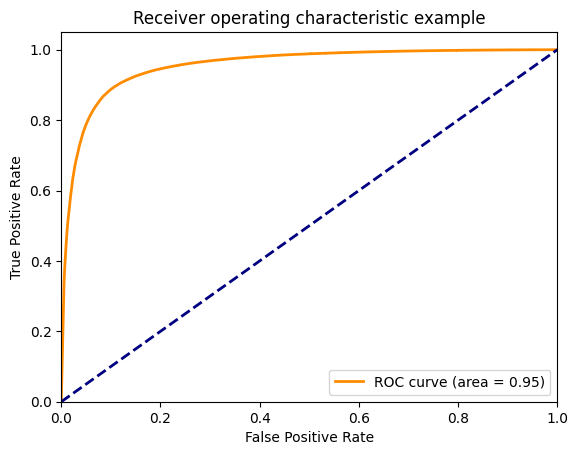

C:\Users\FIONA_SHREK\AppData\Local\Temp\ipykernel_12660\3525901907.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels)
C:\Users\FIONA_SHREK\AppData\Local\Temp\ipykernel_12660\3525901907.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels)


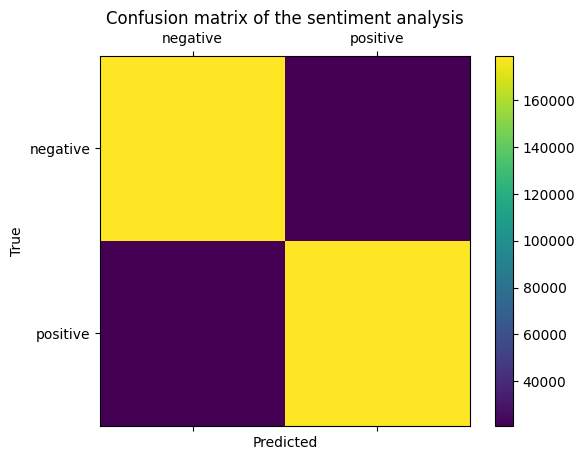

In [46]:
print(classification_report(y_test, y_pred, digits=4))
fpr = dict()
tpr = dict()
roc_auc = dict()

fpr, tpr, _ = roc_curve(y_test, y_pred_prob, pos_label=1)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

plot_cm(cm)

In [ ]:
# SVM Classifier with linear kernel

In [24]:
def plot_auc(label, prediction):
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    fpr, tpr, _ = roc_curve(label, prediction, pos_label=1)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

In [48]:
from sklearn.model_selection import StratifiedShuffleSplit, StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.calibration import CalibratedClassifierCV

def find_params(x_train, y_train):
    C_range = np.logspace(-3, 10, 8)
    param_grid = dict(C=C_range)
    cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
    grid = GridSearchCV(LinearSVC(), param_grid=param_grid, cv=cv)
    grid.fit(x_train, y_train)
    
    # Draw plot for gamma-C value result
    score_dict = grid.grid_scores_

    scores = [x[1] for x in score_dict]
    scores = np.array(scores).reshape(len(C_range))
    
    plt.figure(figsize=(8, 6))
    plt.subplots_adjust(left=0.15, right=0.95, bottom=0.15, top=0.95)
    plt.imshow(scores, interpolation='nearest', cmap=plt.cm.get_cmap("Spectral"))
    plt.ylabel('C')
    plt.colorbar()
    plt.yticks(np.arange(len(C_range)), C_range)
    plt.show()
    
    return grid.best_params_

In [51]:
from sklearn.calibration import CalibratedClassifierCV

def sentiment_svm(train, test, C, frac = 1, max_features = None, kernel='linear', ngram_range=(1,3), gamma=0, use_params=False):
    X_train, y_train = train.sample(frac=frac, random_state=1234).review, train.sample(frac=frac, random_state=1234).target
    X_test, y_test = test.sample(frac=frac, random_state=1234).review, test.sample(frac=frac, random_state=1234).target

    tf_vectorizer = TfidfVectorizer(ngram_range=ngram_range, max_features=max_features)
    X_train = tf_vectorizer.fit_transform(X_train)
    X_test = tf_vectorizer.transform(X_test)

    
    if kernel == 'linear':
        if use_params:
            params = find_params(X_train, y_train)
            print ('Best params: %s' % (params))
            svm = CalibratedClassifierCV(base_estimator=LinearSVC(C=params['C']), cv=5)               
    print(svm)    
    
    t0 = time()
    svm.fit(X_train, y_train)
    train_test_time = time() - t0
    print("training time: {0:.2f}s".format(train_test_time))
    
    probas = svm.predict_proba(X_test)
    y_pred = np.argmax(probas, axis=-1)
    y_pred_prob = [i[1] for i in probas]

    acc_score = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    print("Model accuracy = {0:.3f}%".format(acc_score*100))
    print(classification_report(y_test, y_pred, digits=4))

    plot_auc(y_test, y_pred_prob)
    plot_cm(cm)

CalibratedClassifierCV(base_estimator=LinearSVC(C=0.5), cv=5)


C:\Users\FIONA_SHREK\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\calibration.py:300: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\FIONA_SHREK\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\FIONA_SHREK\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\FIONA_SHREK\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to supp

training time: 214.54s
Model accuracy = 93.753%
              precision    recall  f1-score   support

           0     0.9377    0.9373    0.9375    200000
           1     0.9373    0.9378    0.9375    199997

    accuracy                         0.9375    399997
   macro avg     0.9375    0.9375    0.9375    399997
weighted avg     0.9375    0.9375    0.9375    399997



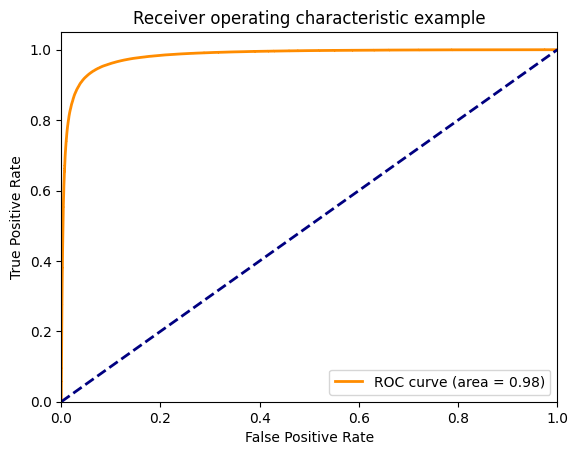

C:\Users\FIONA_SHREK\AppData\Local\Temp\ipykernel_12660\3525901907.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels)
C:\Users\FIONA_SHREK\AppData\Local\Temp\ipykernel_12660\3525901907.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels)


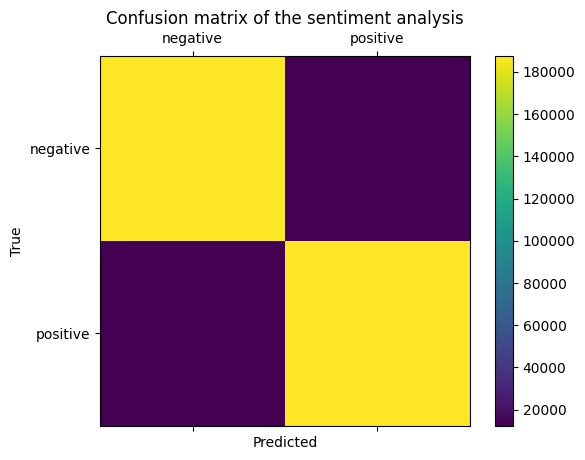

In [52]:
sentiment_svm(df_train_data, df_test_data, 0.5)

In [ ]:
#CNN 

In [12]:
from keras.layers import *
from keras.models import Model
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.utils import shuffle

In [13]:
X_train = list(df_train_data.review)
X_test = list(df_test_data.review)

In [14]:
y_train = [[1,0] if x == 0 else [0,1] for x in df_train_data.target]
y_test = [[1,0] if x == 0 else [0,1] for x in df_test_data.target]

In [15]:
X_train, y_train = shuffle(X_train, y_train)
X_test, y_test = shuffle(X_test, y_test)

y_train = np.array(y_train)
y_test = np.array(y_test)

In [16]:
max_feature = 5000
maxlen = 100
embed_size = 25

In [17]:
tokenizer = Tokenizer(num_words=max_feature)
tokenizer.fit_on_texts(X_train)

In [18]:
token_train = tokenizer.texts_to_sequences(X_train)
token_test = tokenizer.texts_to_sequences(X_test)

In [19]:
X_train_final = pad_sequences(token_train, maxlen=maxlen, padding='post')
X_test_final = pad_sequences(token_test, maxlen=maxlen, padding='post')

In [20]:
from IPython.display import clear_output
import keras

class PlotLosses(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.i = 0
        self.x = []
        self.losses = []
        self.val_losses = []
        
        self.fig = plt.figure()
        
        self.logs = []

    def on_epoch_end(self, epoch, logs={}):
        
        self.logs.append(logs)
        self.x.append(self.i)
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        self.i += 1
        
        clear_output(wait=True)
        plt.plot(self.x, self.losses, label="loss")
        plt.plot(self.x, self.val_losses, label="val_loss")
        plt.legend()
        plt.show();
        
plot_losses = PlotLosses()

In [21]:
from keras import optimizers
from keras import regularizers
eta = 1
maxlen=100
input = Input(shape=(maxlen,))
net = Embedding(max_feature, embed_size)(input)
net = Dropout(0.2)(net)
net = BatchNormalization()(net)

net = Conv1D(16, 8, padding='same', activation='relu')(net)
net = Dropout(0.2)(net)
net = BatchNormalization()(net)
net = Conv1D(16, 4, padding='same', activation='relu')(net)
net = Dropout(0.2)(net)
net = BatchNormalization()(net)
net = Conv1D(16, 4, padding='same', activation='relu')(net)
net = Dropout(0.2)(net)
net = BatchNormalization()(net)
net = Conv1D(16, 4, padding='same', activation='relu')(net)
net = Dropout(0.2)(net)
net1 = BatchNormalization()(net)

net = Conv1D(2, 1)(net)
net = GlobalAveragePooling1D()(net)
output = Activation('softmax')(net)
model = Model(inputs = input, outputs = output)
ada = optimizers.legacy.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
model.compile(optimizer=ada, loss='categorical_crossentropy', metrics=['acc'])
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100)]             0         
                                                                 
 embedding (Embedding)       (None, 100, 25)           125000    
                                                                 
 dropout (Dropout)           (None, 100, 25)           0         
                                                                 
 batch_normalization (Batch  (None, 100, 25)           100       
 Normalization)                                                  
                                                                 
 conv1d (Conv1D)             (None, 100, 16)           3216      
                                                                 
 dropout_1 (Dropout)         (None, 100, 16)           0         
                                                             

C:\Users\FIONA_SHREK\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\optimizers\legacy\adam.py:118: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


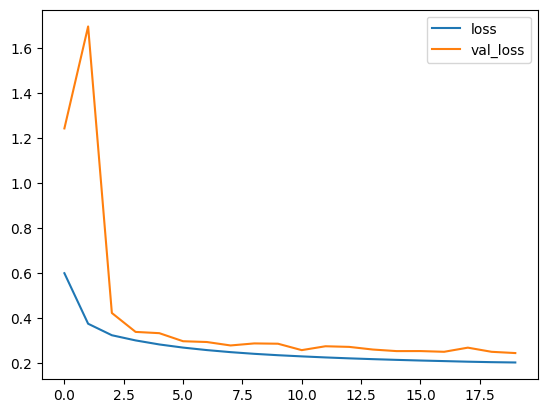

281/281 [==============================] - 225s 801ms/step - loss: 0.2037 - acc: 0.9203 - val_loss: 0.2456 - val_acc: 0.9026
Accuracy: 0.8451122075319291


In [22]:
train_res = model.fit(X_train_final, y_train, batch_size=2048, epochs=20, validation_split=0.1, callbacks=[plot_losses])
acc = train_res.history['val_acc']
print('Accuracy: {}'.format(np.mean(acc)))

12500/12500 [==============================] - 37s 3ms/step


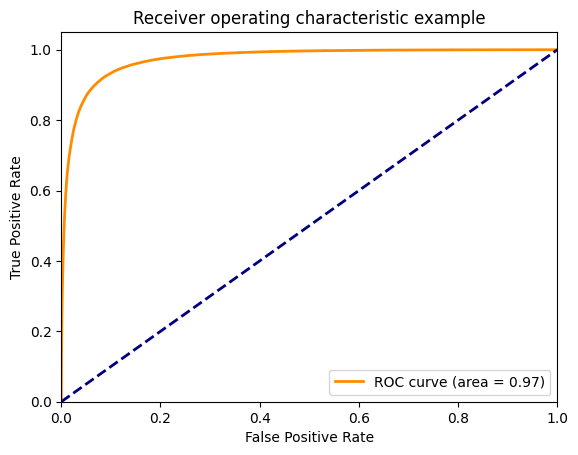

C:\Users\FIONA_SHREK\AppData\Local\Temp\ipykernel_28888\3525901907.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels)
C:\Users\FIONA_SHREK\AppData\Local\Temp\ipykernel_28888\3525901907.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels)


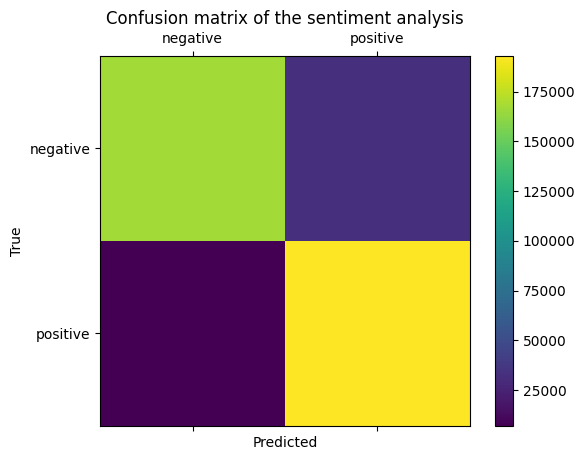

              precision    recall  f1-score   support

           0     0.9594    0.8372    0.8942    200000
           1     0.8556    0.9646    0.9068    199997

    accuracy                         0.9009    399997
   macro avg     0.9075    0.9009    0.9005    399997
weighted avg     0.9075    0.9009    0.9005    399997



In [27]:
y_prob = model.predict(X_test_final)
y_pred = y_prob.argmax(axis=-1)
y_test_raw = [0 if (x == [1,0]).all() else 1 for x in y_test]
y_pred_prob = [i[1] for i in y_prob]
plot_auc(y_test_raw, y_pred_prob)
plot_cm(confusion_matrix(y_test_raw, y_pred))
print(classification_report(y_test_raw, y_pred, digits=4))